# USDA Ag Census: Lettuce as a share of each county's harvested veggies

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

## Read USDA data (from [here](https://www.nass.usda.gov/Publications/AgCensus/2017/Online_Resources/Ag_Census_Web_Maps/Data_download/index.php))

#### Variable names lookup

In [4]:
variables = pd.read_excel(
    "data/raw/NASSAgcensusDownload2017GIS.xlsx", sheet_name="Variable Lookup"
)

In [5]:
variables[variables["MapTitle"].str.contains("Lettuce")]

,MapID,Category,Subcategory,MapTitle
53,y17_M176,Crops and Plants,Vegetables and Melons Harvested,"All Lettuce, Acres Harvested for Sale, as Percent of Vegetables, Harvested Acres for Sale: 2017"


#### Counties

In [6]:
counties = pd.read_excel(
    "data/raw/NASSAgcensusDownload2017GIS.xlsx", sheet_name="County Names"
)

#### Crops

In [7]:
crops = pd.read_excel(
    "data/raw/NASSAgcensusDownload2017GIS.xlsx",
    sheet_name="Crops and Plants",
    dtype={"FIPS": str, "FIPSTEXT": str},
)

#### Filter crops to just lettuce

In [8]:
crops_cols = [col for col in crops.columns if "y17_M176" in col]
crops_cols

['y17_M176_valueText', 'y17_M176_classRange', 'y17_M176_valueNumeric']

#### How much of each county's harvested veggies are lettuce

In [9]:
crops_df = crops[
    [
        "FIPSTEXT",
        "y17_M176_classRange",
        "y17_M176_valueNumeric",
    ]
].copy()

In [10]:
crops_df.head()

,FIPSTEXT,y17_M176_classRange,y17_M176_valueNumeric
0,00000,NaN,7.86
1,01001,Less than 1,0.00
2,01003,Less than 1,NaN
3,01005,Less than 1,0.00
4,01007,Less than 1,0.00


In [11]:
crops_df.rename(
    columns={
        "FIPSTEXT": "fips",
        "y17_M176_classRange": "pct_range",
        "y17_M176_valueNumeric": "pct_lettuce",
    },
    inplace=True,
)

In [12]:
crops_df.drop(0, inplace=True)

In [13]:
df = crops_df[crops_df["pct_lettuce"] > 0.01].reset_index()

---

## Geography

#### Counties

In [14]:
gdf_src = gpd.read_file("data/processed/usa_counties_slim.geojson")

In [15]:
gdf = gdf_src[
    [
        "fips",
        "name",
        "state_name",
        "pop2010",
        "pop10_sqmi",
        "sqmi",
        "no_farms17",
        "ave_size17",
        "crop_acr17",
        "ave_sale17",
        "geometry",
    ]
].copy()

#### Merge with lettuce data

In [16]:
lettuce_gdf = gpd.GeoDataFrame(pd.merge(df, gdf, on="fips"))

<AxesSubplot:>

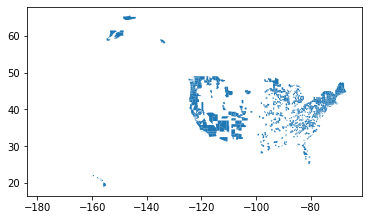

In [17]:
lettuce_gdf.plot()

In [18]:
lettuce_gdf.to_file("data/processed/lettuce_counties.geojson", driver="GeoJSON")